## This is a notebook for reading various pickle and json file/results to see their schemas and play round with them

In [2]:
from six.moves import cPickle as pkl
import json
from pprint import pprint


In [24]:
with open('data/flickr8k/flicker_8k_align.dev.pkl','r') as f:
    caps = pkl.load(f)
    feats = pkl.load(f)
    
#print dev

cap, ind = dev[0]
feat = feats[0]


(1, 100352)
100352


In [13]:
with open('flickr8k_deterministic_model.npz.pkl','r') as f:
    param = cPickle.load(f)
    
print param

{'n_words': 10000, 'decay_c': 0.0, 'patience': 10, 'save_per_epoch': False, 'n_layers_init': 2, 'RL_sumCost': True, 'max_epochs': 5000, 'dispFreq': 1, 'attn_type': 'deterministic', 'validFreq': 2000, 'temperature': 1.0, 'n_layers_att': 2, 'saveto': 'flickr8k_deterministic_model.npz', 'ctx_dim': 512, 'valid_batch_size': 1, 'lstm_encoder': False, 'n_layers_lstm': 1, 'optimizer': 'adam', 'alpha_c': 1.0, 'dictionary': None, 'batch_size': 1, 'selector': True, 'lrate': 0.01, 'dataset': 'flickr8k', 'ctx2out': True, 'prev2out': True, 'dim': 1800, 'use_dropout': True, 'dim_word': 512, 'sampleFreq': 250, 'semi_sampling_p': 0.5, 'n_layers_out': 1, 'reload_': False, 'maxlen': 100, 'alpha_entropy_c': 0.002, 'use_dropout_lstm': False, 'saveFreq': 1000}


decoder_b_att_1
Wemb
ff_init_1_b
ff_logit_ctx_b
decoder_W_sel
decoder_U
decoder_W
ff_state_b
ff_logit_lstm_W
ff_logit_ctx_W
decoder_W_att_1
decoder_b
decoder_Wc
ff_logit_lstm_b
decoder_b_att
ff_init_1_W
ff_logit_b
ff_logit_W
decoder_Wc_att
ff_state_W
zipped_params
train_err
decoder_c_tt
ff_memory_W
decoder_b_sel
test_err
decoder_Wd_att
ff_memory_b
decoder_U_att
history_errs
valid_err
5000 5455


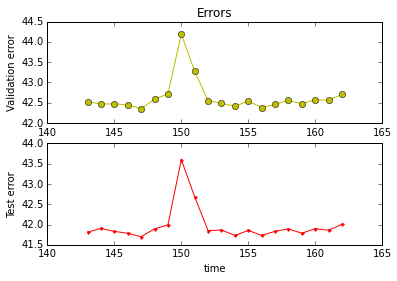

In [37]:
#loading trained model
import numpy as np
dict = np.load('model/flickr8k/flickr8k_deterministic_model.adam64.final.npz')

for k,v in dict.iteritems():
    print k
    
print len(dict['test_err']), len(dict['valid_err'])

valid_errs = [x for [x,_] in dict['history_errs']]
test_errs = [x for [_,x] in dict['history_errs']]

epochs = range(len(valid_errs))
tail = 20

%matplotlib inline  
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(epochs[-tail:], valid_errs[-tail:], 'yo-')
plt.title('Errors')
plt.ylabel('Validation error')

plt.subplot(2, 1, 2)
plt.plot(epochs[-tail:], test_errs[-tail:], 'r.-')
plt.xlabel('time')
plt.ylabel('Test error')

plt.show()

In [30]:
"""
Creating the reference caption txt for the current 10-image dev set. 
"""
path = "/Users/zhuyifan/Documents/2016 Summer Research/textmatters/arctic-captions/data/flickr8k/"
with open(path+'flicker_8k_align.test.pkl','r') as f:
    caps = pkl.load(f)
    feats = pkl.load(f)


('A boy wearing a jean jacket with his hand on his chest smiling at the camera .', 0)


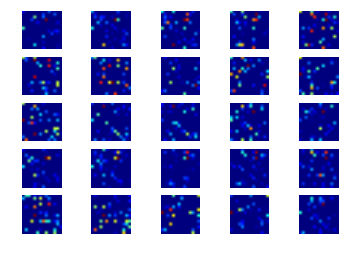

In [47]:

# filter captions with same id
# seen = set()
# refs = [cap for cap, idx in data if idx not in seen and not seen.add(idx)]

# refs = [s for (s,idx) in data]
# with open(path+'flicker_8k_refs.testOrig.txt', 'w+') as f:
#     for line in refs:
#         print>>f, line

print caps[0]
feature = feats[0].todense().reshape((14*14,512))
flist = []
for i in range(512):
    flist.append(feature[:,i].reshape((14,14)))

W,H = 5,5
plt.subplot(W,H,1)
plt.axis("off")
for w in range(W):
    for h in range(H):
        plt.subplot(W,H,w*W+h)
        plt.axis("off")
        plt.imshow(flist[w*W+h])

plt.show()

In [32]:
"""
Plot animation for fun
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

#hyper parameter
a=2
steps = 1000

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-3*a, 3*a), ylim=(-3*a, 1.5*a))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    theta = np.linspace(0,20.*np.pi*i/steps, i)
    r = np.apply_along_axis(lambda x: a*(1-np.sin(x)), 0, theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=steps, interval=20, blit=False)

plt.show()

In [4]:
JSON_PATH = '../neuraltalk2/vis/'
with open(JSON_PATH+'vis.json', 'r') as f:
    res = json.load(f)
print(res)

[{u'caption': u'a baseball player holding a bat on a field', u'image_id': u'1'}, {u'caption': u'a little girl sitting at a table with a cake', u'image_id': u'2'}, {u'caption': u'a man riding a skateboard up the side of a ramp', u'image_id': u'3'}, {u'caption': u'a woman sitting on a couch with a dog', u'image_id': u'4'}, {u'caption': u'a clock sitting on a table next to a computer mouse', u'image_id': u'5'}, {u'caption': u'an airplane is on the runway at the airport', u'image_id': u'6'}, {u'caption': u'a man holding a banana in his hand', u'image_id': u'7'}, {u'caption': u'a group of people riding on a boat on a river', u'image_id': u'8'}, {u'caption': u'a couple of cell phones sitting on top of a table', u'image_id': u'9'}, {u'caption': u'a steam engine train traveling down train tracks', u'image_id': u'10'}]
